# CS 773 Data Mining and Security

## Course Project - Analyzing Open University Learning Analytics Dataset 

### Problem Statement 

Based on the given data of students enrolled in various courses identify the student who is at-risk so that suitable interventions can be taken to help students succeed. 

***Part-2 : Exploratory Data Analysis (EDA)***

In this part we visualize the data to gain insights and find patterns in the data.

In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#bokeh
from bokeh.io import output_notebook, show
output_notebook()
from bokeh.plotting import figure, output_file, show, ColumnDataSource

Loading BokehJS ...

In [2]:
# Reading Data
student_info = pd.read_csv('../data/studentInfo.csv')
student_assessment = pd.read_csv('../data/studentAssessment.csv')
student_registration = pd.read_csv('../data/studentRegistration.csv')
student_vle = pd.read_csv('../data/studentVle.csv')
assessments = pd.read_csv('../data/assessments.csv')
courses = pd.read_csv('../data/courses.csv')
vle = pd.read_csv('../data/vle.csv')

#check for the data
print('----- Rows -----')
print('Courses     : ',courses.shape[0])
print('Assessments : ',assessments.shape[0])
print('vle(Virtual Learning Environment) : ',vle.shape[0])
print('Student Info         : ',student_info.shape[0])
print('student Assessment   : ',student_assessment.shape[0])
print('student Registration : ',student_registration.shape[0])
print('student Vle          : ',student_vle.shape[0])

----- Rows -----
Courses     :  22
Assessments :  206
vle(Virtual Learning Environment) :  6364
Student Info         :  32593
student Assessment   :  173912
student Registration :  32593
student Vle          :  10655280


In [3]:
#plots a grid of multiple courses
def plot_grid(data, columns_X, columns_Y, filter_by, result):
    grid_pos = 1
    nrow = data[columns_X].unique().size
    ncol = data[columns_Y].unique().size
    fig = plt.figure(figsize = (30,100))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for val1 in data[columns_X].unique():
        for val2 in data[columns_Y].unique():
            ax = fig.add_subplot(nrow, ncol, grid_pos)
            ax.set_title(val2 + ' / ' + val1) 
            df = data[data[columns_X] == val1]
            df = df[df[columns_Y] == val2]
            plot_df = df.groupby([filter_by, result]).size().unstack()
            if(plot_df.fillna(0).size != 0):
                #print(val2 + ' / ' + val1)
                plot_df.plot(kind = 'bar', ax = ax)
                grid_pos+=1
    plt.show()

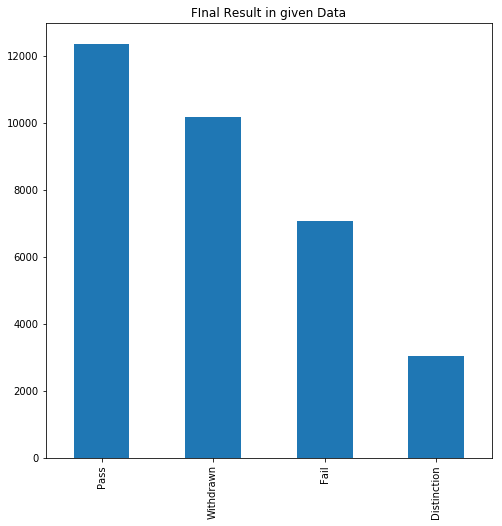

In [4]:
# we want to see how many students pass or fail in the previous data
#print(student_info['final_result'].value_counts())
student_info['final_result'].value_counts().plot(kind='bar', title='FInal Result in given Data', figsize=(8,8))
plt.show()

***We can see that out of 32593, 10156 students have withdrawn from the courses. from this we could draw an inference for withdrawn students i.e. need to check if withdrawn students have taken any other courses in that semester or not.***

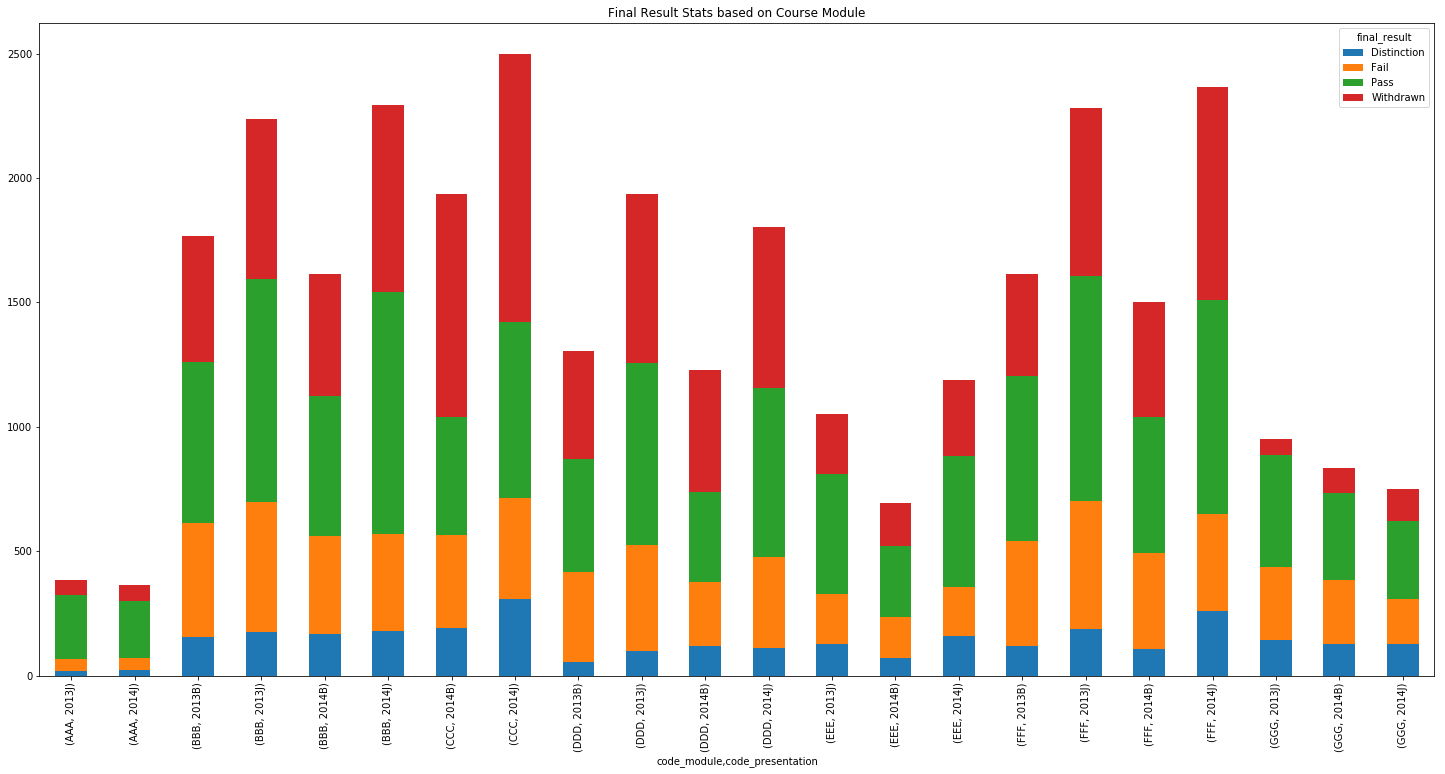

In [5]:
# get the students final result as per the course
student_info.groupby(['code_module','code_presentation','final_result']).size().unstack().plot(kind='bar', stacked=True, title='Final Result Stats based on Course Module',figsize=(25,12))
#student_info.groupby(['code_module','code_presentation','final_result']).size()
#final_result_stats.plot(kind='bar', x = 'code_module')
plt.show()

***As stacked bar graphs are confusing to infer i have used unstacked bar graph to show the stats***

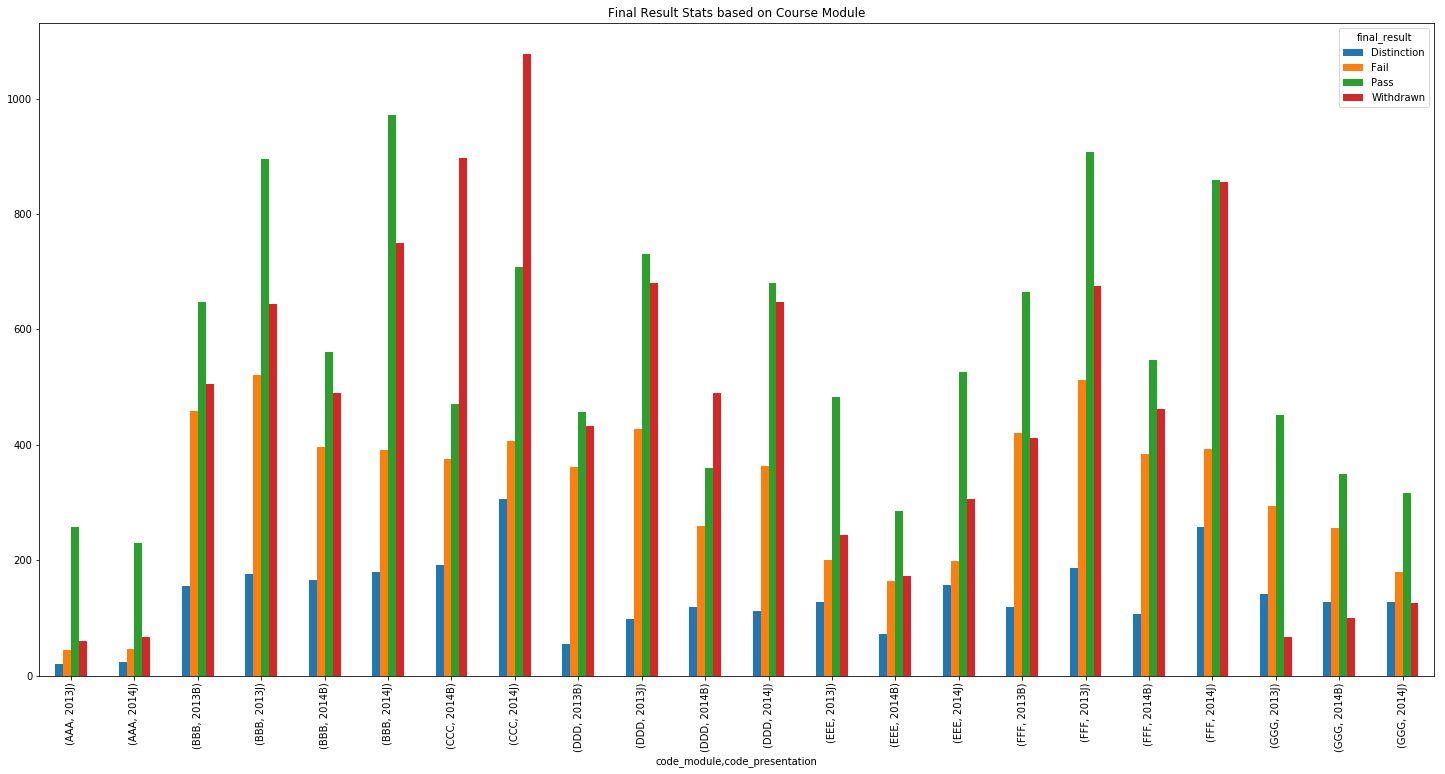

In [68]:
student_info.groupby(['code_module','code_presentation','final_result']).size().unstack().plot(kind='bar', title='Final Result Stats based on Course Module',figsize=(25,12))
plt.show()

##### Insights from above Graph (Final Results Based on Course Module, Course_presentation) #####
- all courses have good pass percentage when compared to their registration rate
- courses AAA have less withdrawl rate
- For Course BBB the rate looks uniform for both years
- Withdrawl rate is high for CCC in both the offerings 2014B, 2014J, infact it increased in the later year along with students registered, i.e. more students got registered in course and nearly 40% of them withdrew from the course.
- For course DDD the rate of change is uniform in all offerings
- Course EEE has third less withdrawl rate compared to all others, Failure rate is also less
- Course FFF withdrawl rate can be seen increasing based on past 2 years data, whereas other rates(Pass, Fail) remains uniform. 
- we can see that for Course GGG in 2013J withdrawl rate was less which has been increased in 2014B and 2014J, also number of students registering for the course are also decreasing
- From the above we can see that all the courses we have a good amount of students being withdrawn from the subjects reason unknown

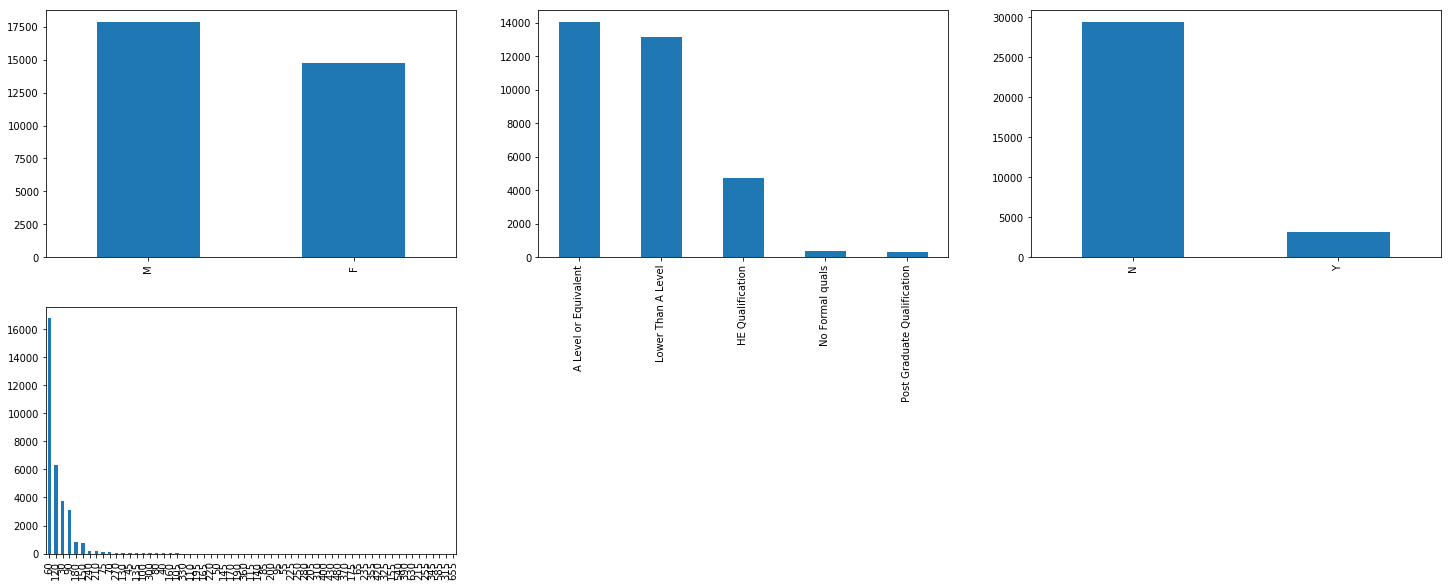

In [5]:
# Visualizing all the data
#-- gender
plt.figure(figsize=(25,10))
plt.subplot(231)
student_info['gender'].value_counts().plot.bar()
#-- higher Education
plt.subplot(232)
student_info['highest_education'].value_counts().plot.bar()
#--disability
plt.subplot(233)
student_info['disability'].value_counts().plot.bar()
#--Student credits
plt.subplot(234)
student_info['studied_credits'].value_counts().plot.bar()


***lets dive more deep into the data and get student results based on the following.***
- gender : flter the final results based on gender
- age_band : lets see what are the stats when we segregate them by age_band
- Education : lets see the stats when filtered by their past education
- Studied credits : filter the data based on past_credits

***Using gender*** 
- lets get some insights about the gender

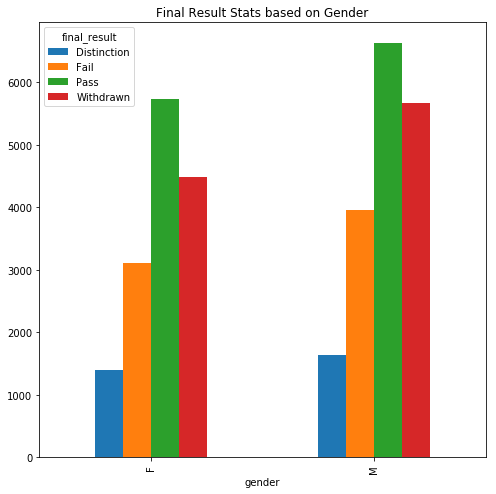

In [82]:
student_info.groupby(['gender','final_result']).size().unstack().plot(kind='bar', title='Final Result Stats based on Gender',figsize=(8,8))
plt.show()

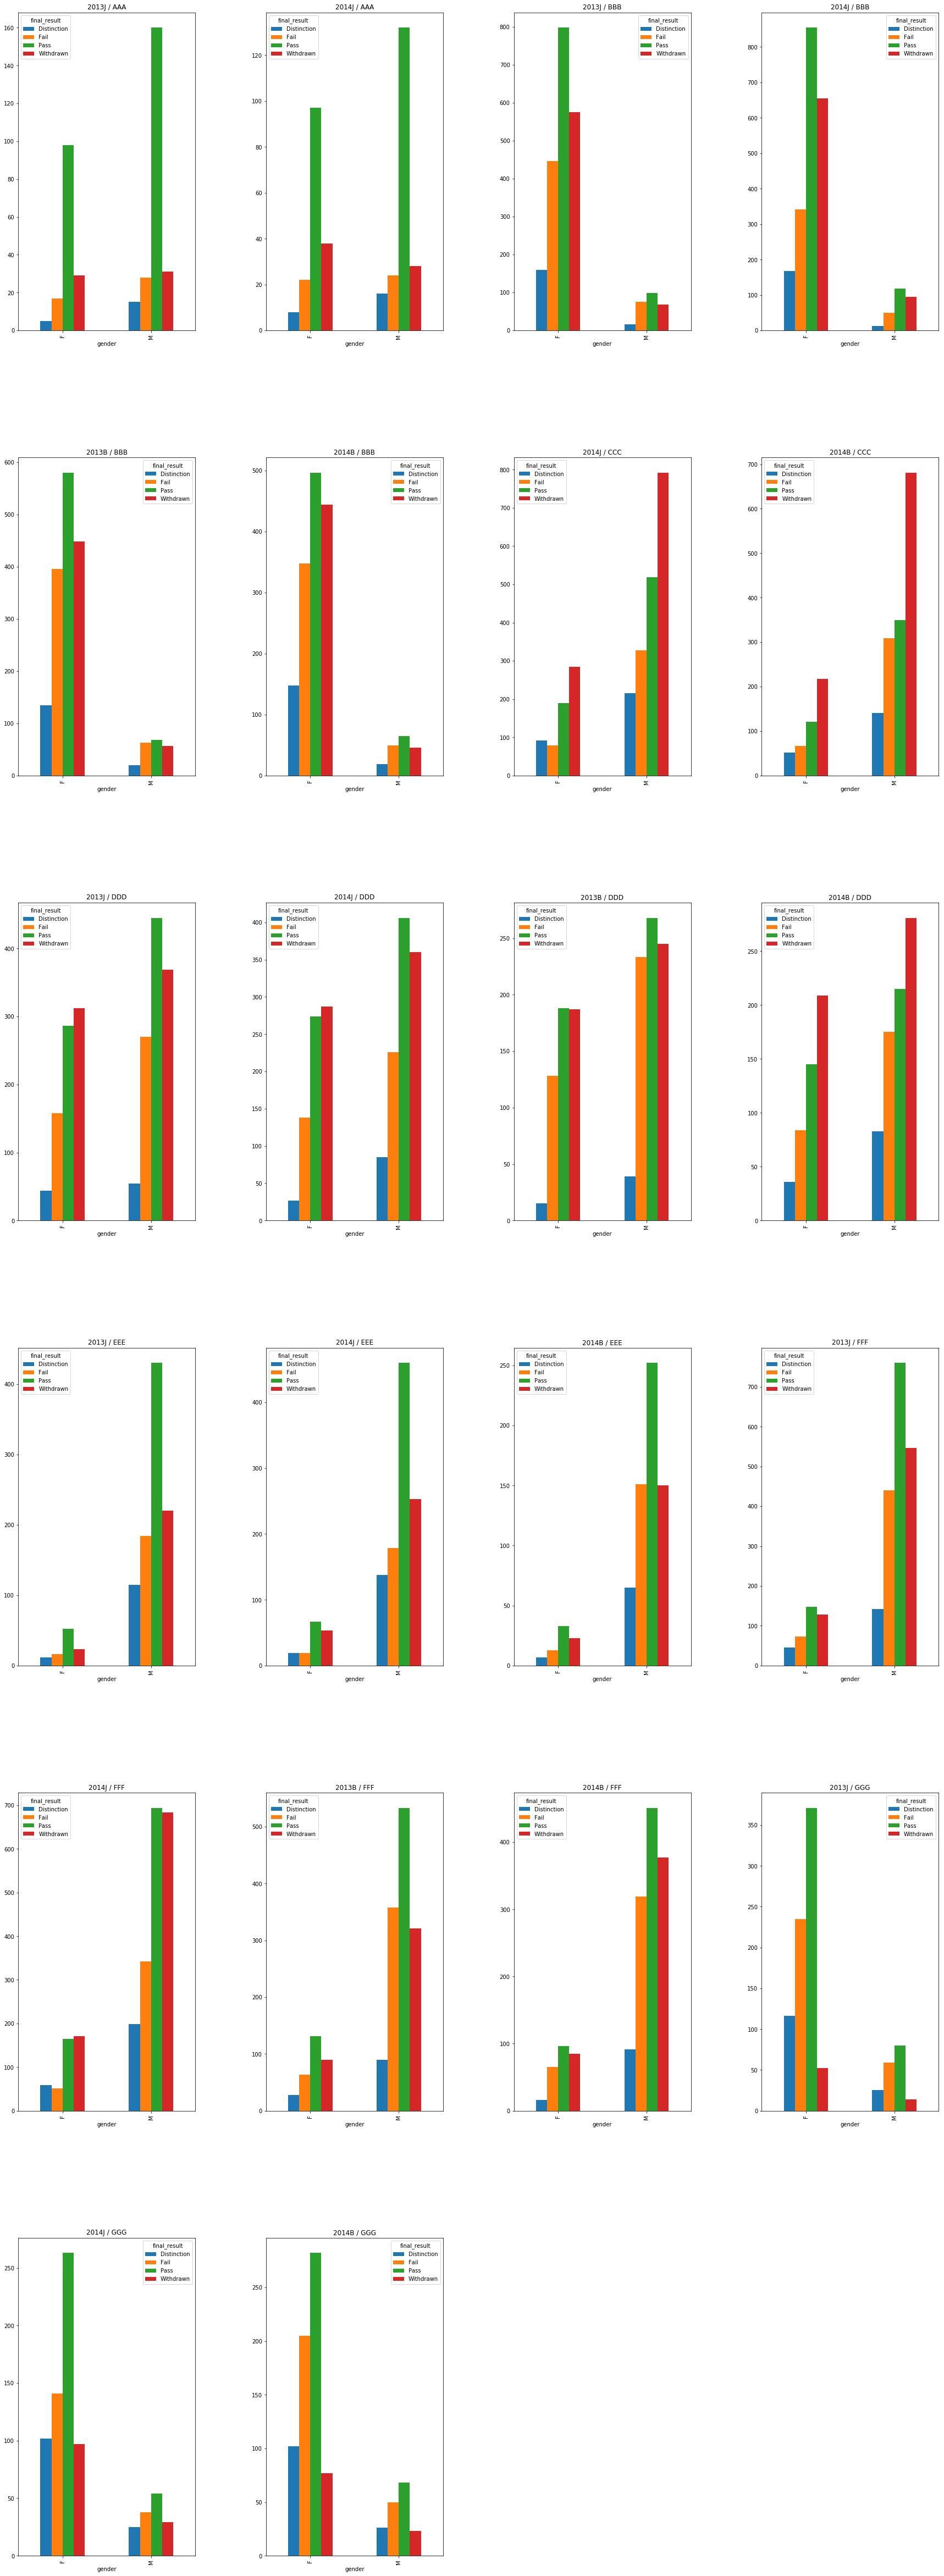

In [168]:
#student_info.groupby(['code_module','code_presentation','gender','final_result']).size().unstack() # --- Group by DF
plot_grid(student_info, 'code_module','code_presentation','gender','final_result')

***Using age_band*** 
- lets get some insights about the age group

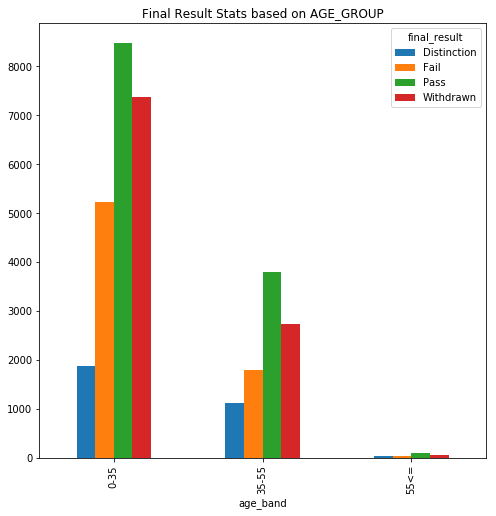

In [81]:
student_info.groupby(['age_band','final_result']).size().unstack().plot(kind='bar', title='Final Result Stats based on AGE_GROUP',figsize=(8,8))
plt.show()

***plotting the data for the age_band based on code_module and code_presentation***

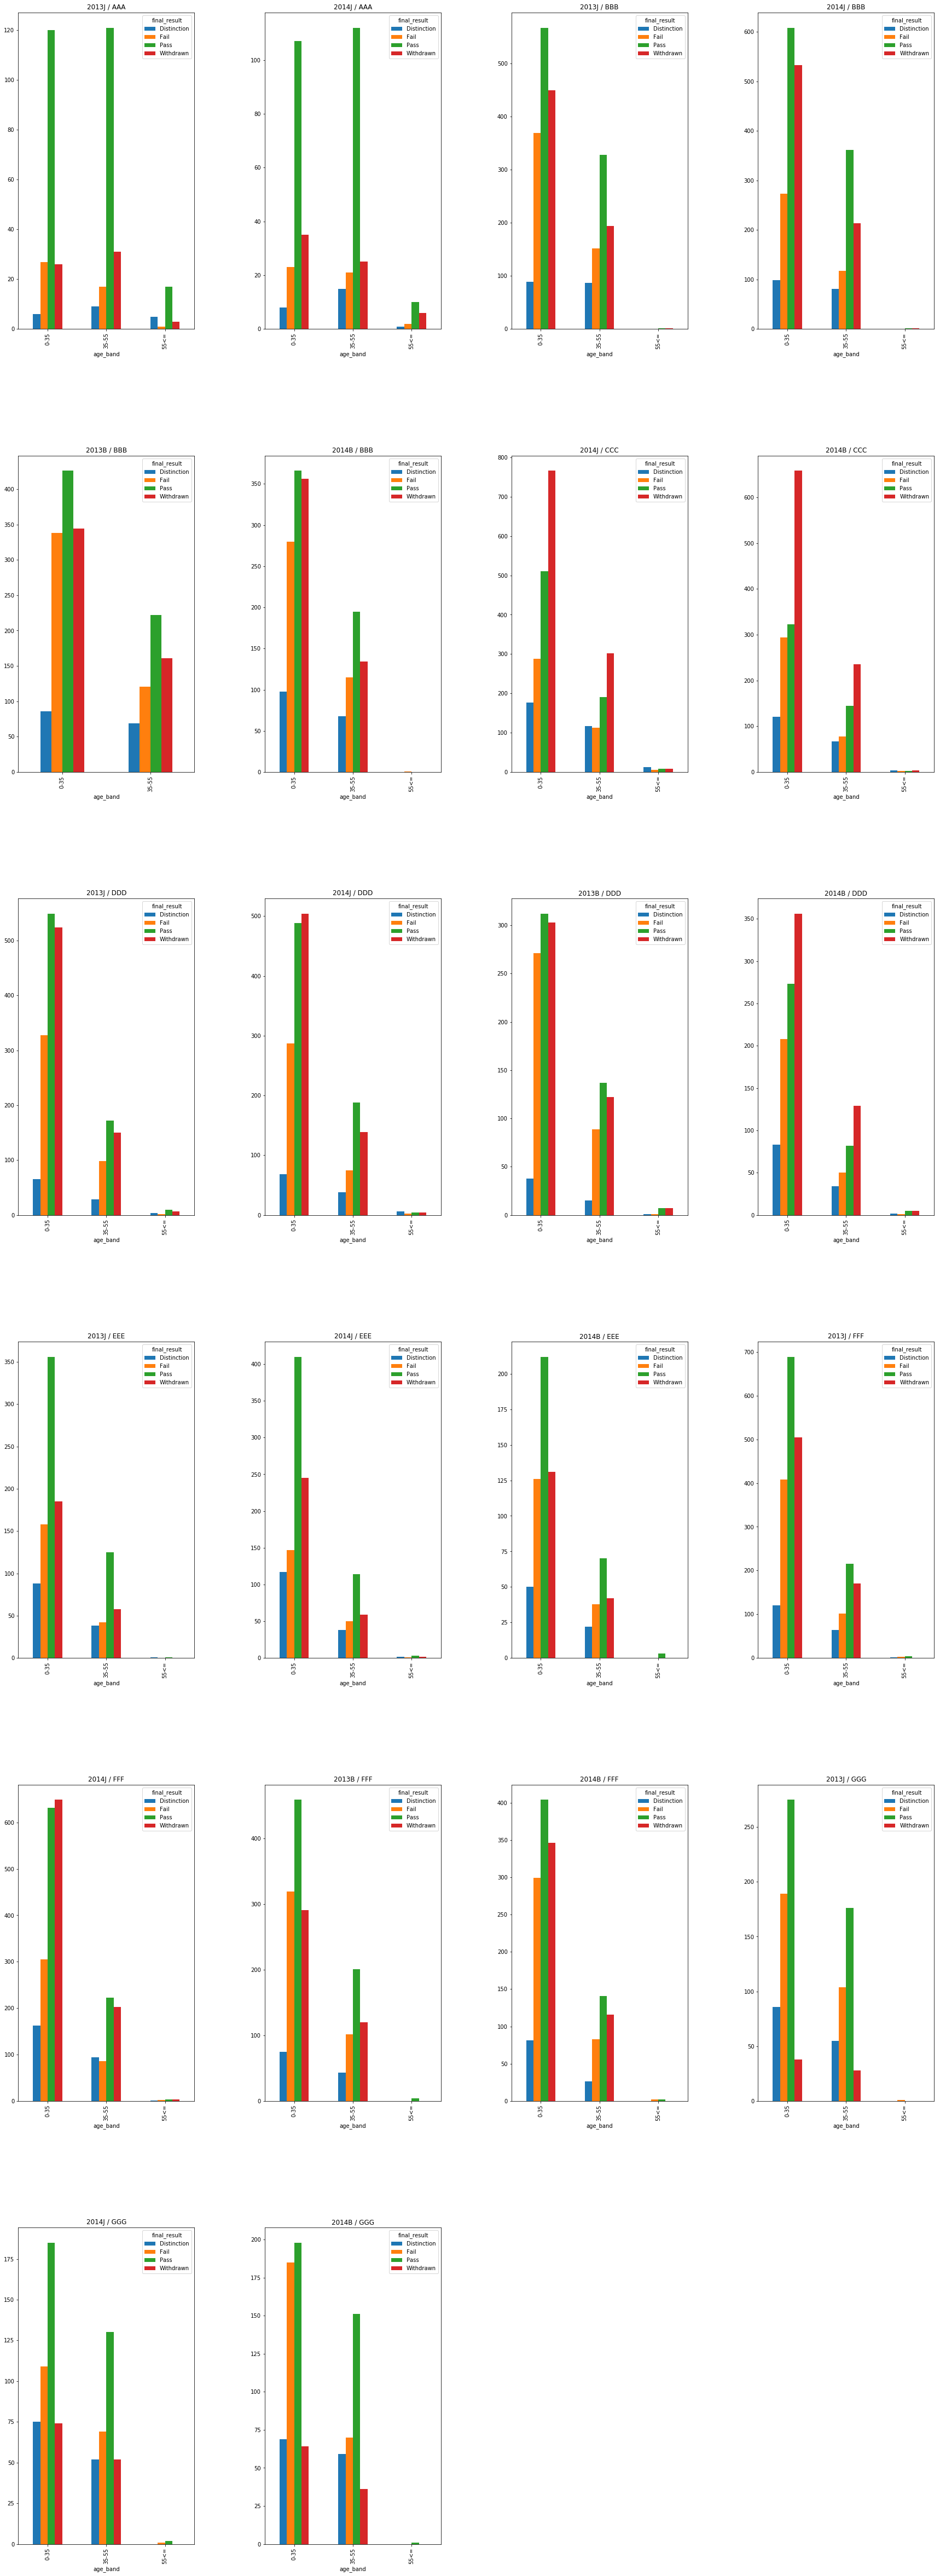

In [169]:
# create subplots for all the data based on course
#---plot
#student_info.groupby(['age_band','code_module','code_presentation','final_result']).size().unstack().plot(kind='bar', title='Final Result Stats based on Course Module',figsize=(25,12))
#plt.show()
#--- data
#student_info.groupby(['code_module','code_presentation','age_band','final_result']).size().unstack()
#plotting and visualizing the data
plot_grid(student_info, 'code_module','code_presentation','age_band','final_result')

2) Using highest_education
- lets get some insights about the highest_education

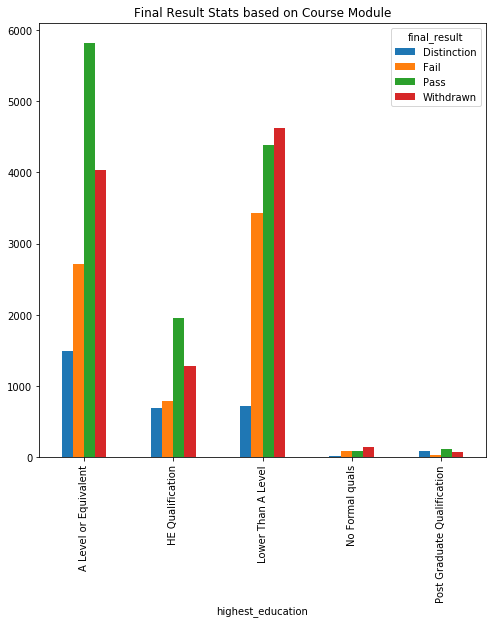

In [83]:
student_info.groupby(['highest_education','final_result']).size().unstack().plot(kind='bar', title='Final Result Stats based on highest_education',figsize=(8,8))
plt.show()

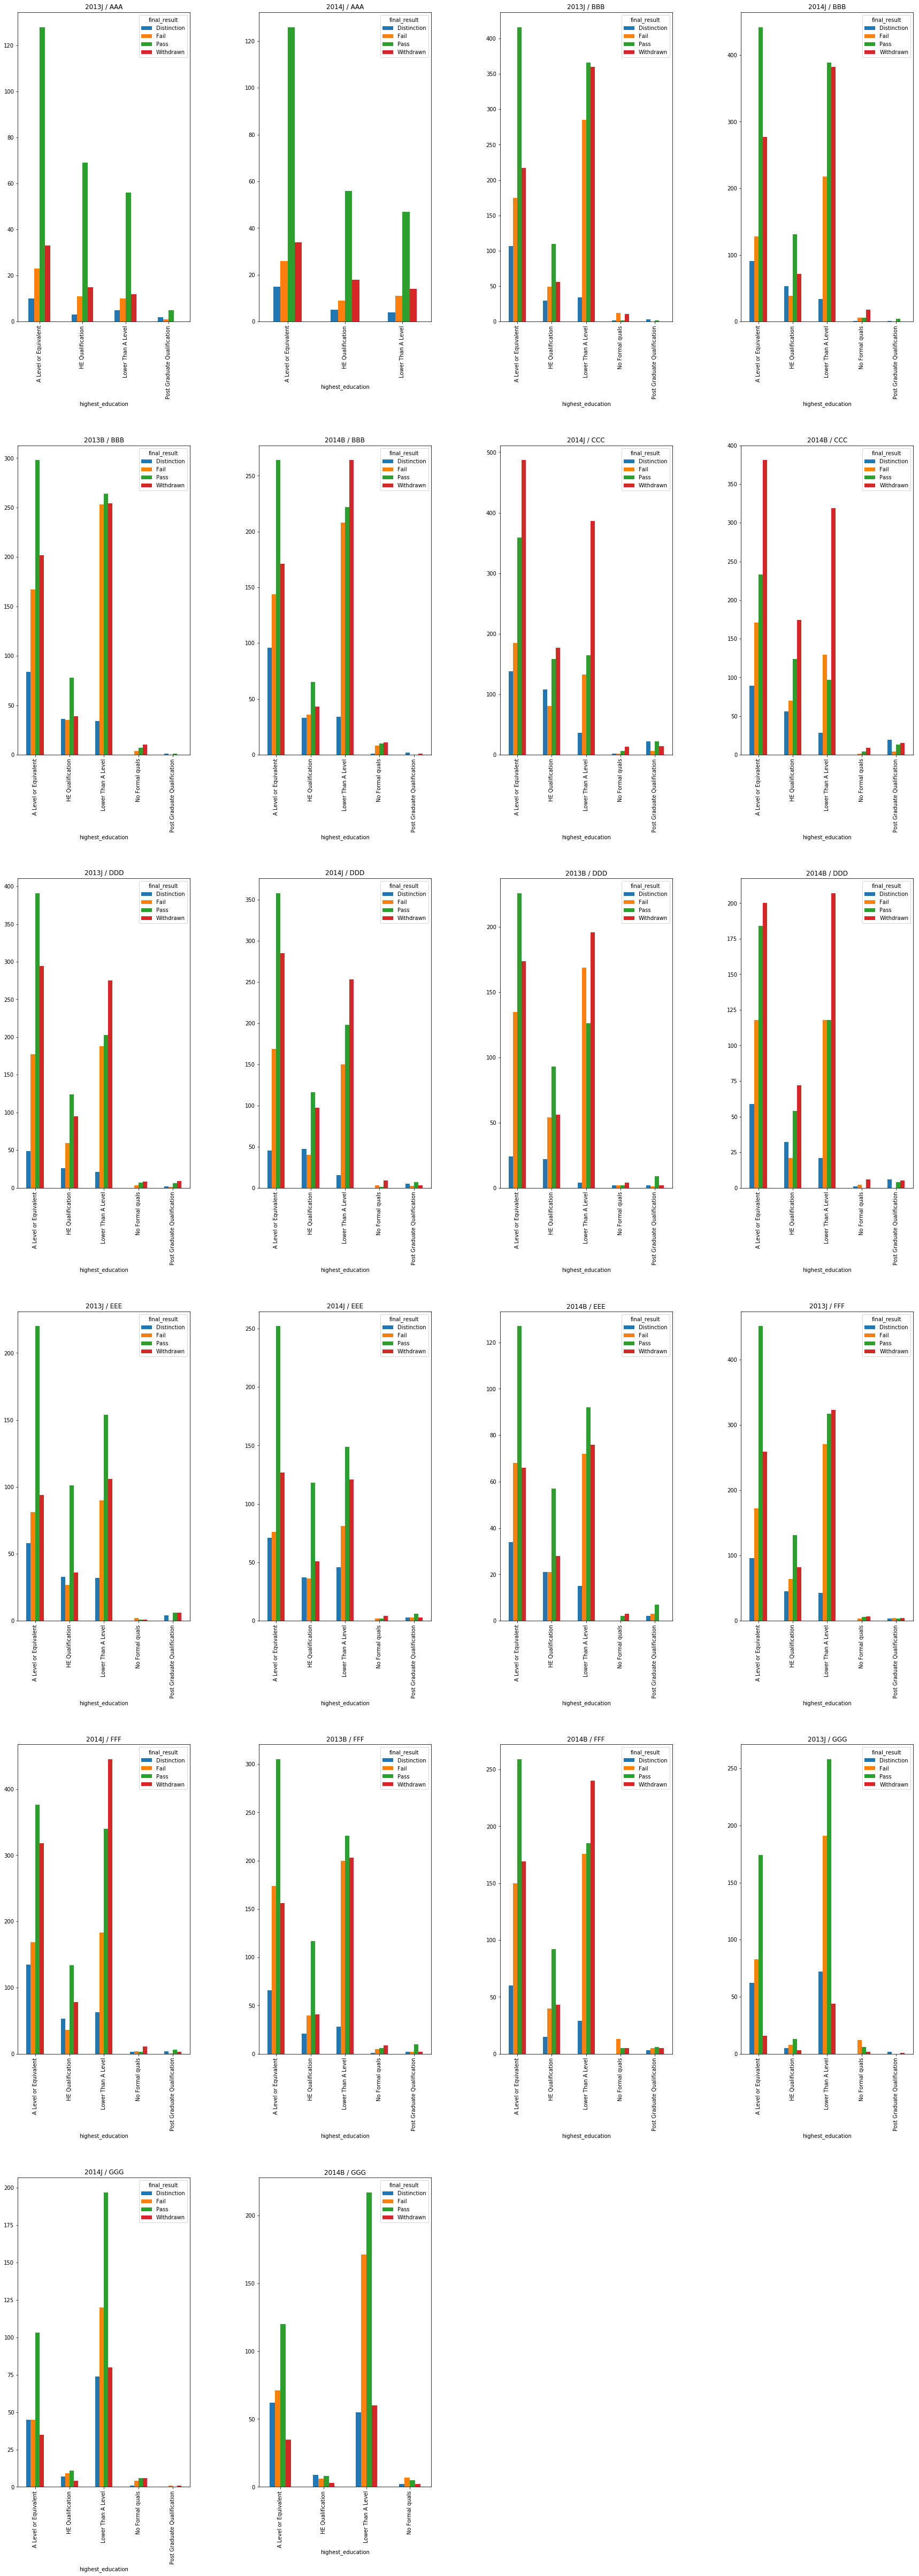

In [170]:
# data of students for courses
#student_info.groupby(['code_module','code_presentation','highest_education','final_result']).size().unstack()
#plotting and visualizing the data
plot_grid(student_info, 'code_module','code_presentation','highest_education','final_result')

***Get Insights from Region***

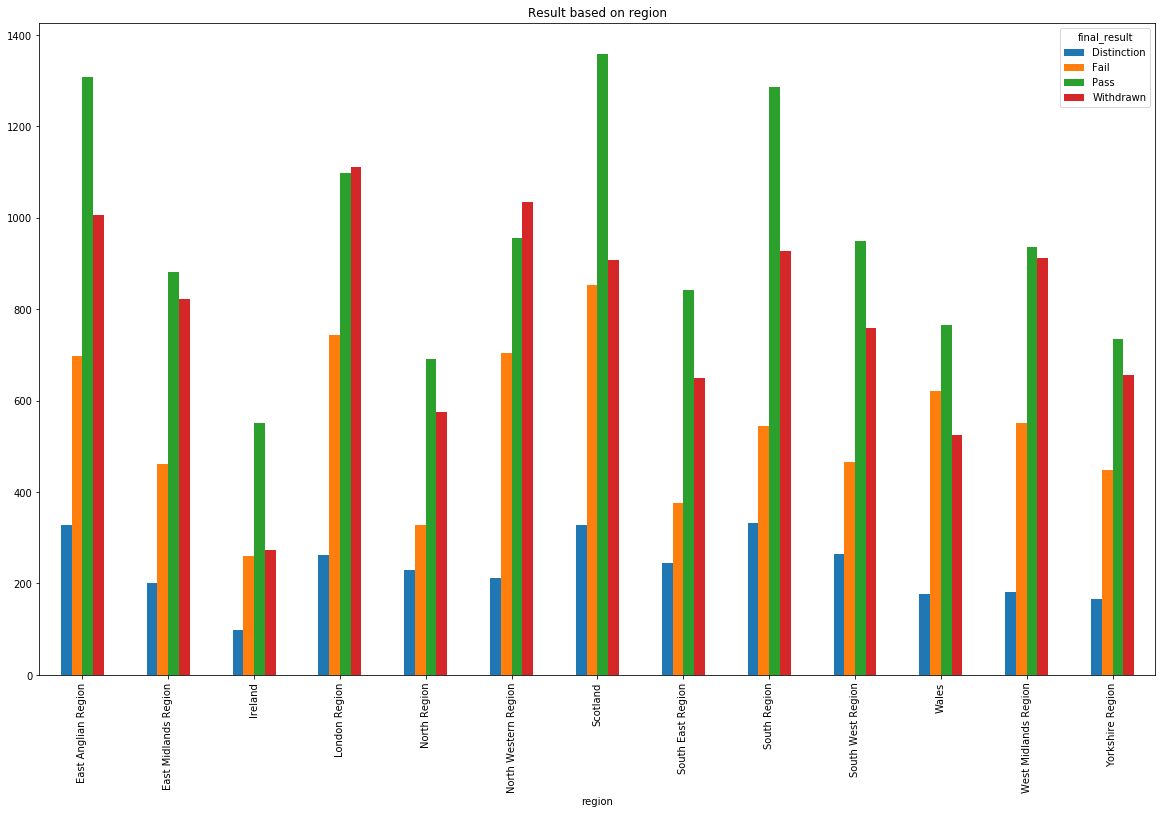

In [102]:
student_info.groupby(['region','final_result']).size().unstack().plot(kind='bar', figsize = (20,12), title='Result based on region')
plt.show()

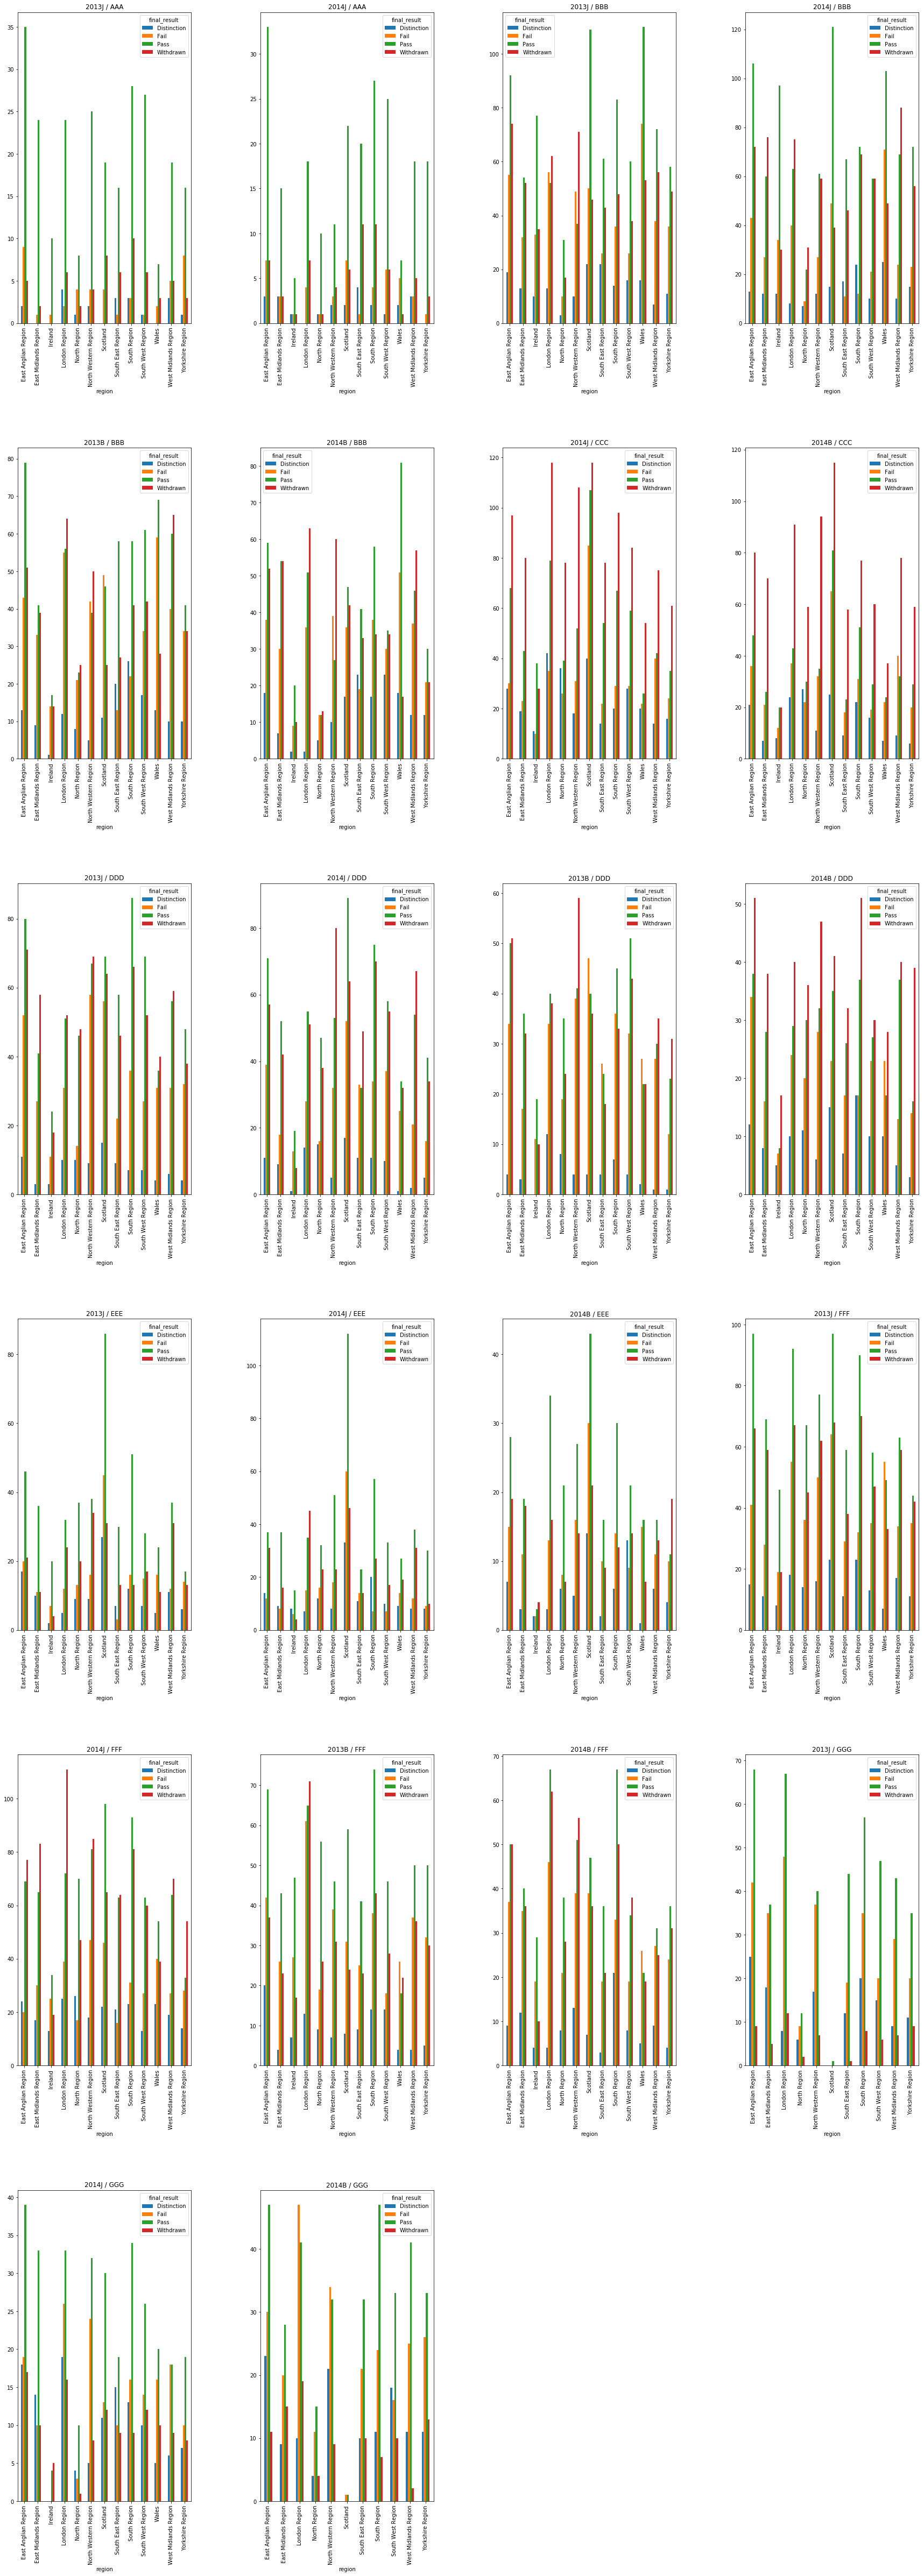

In [171]:
plot_grid(student_info, 'code_module','code_presentation','region','final_result')

Checking for ***imd_band***

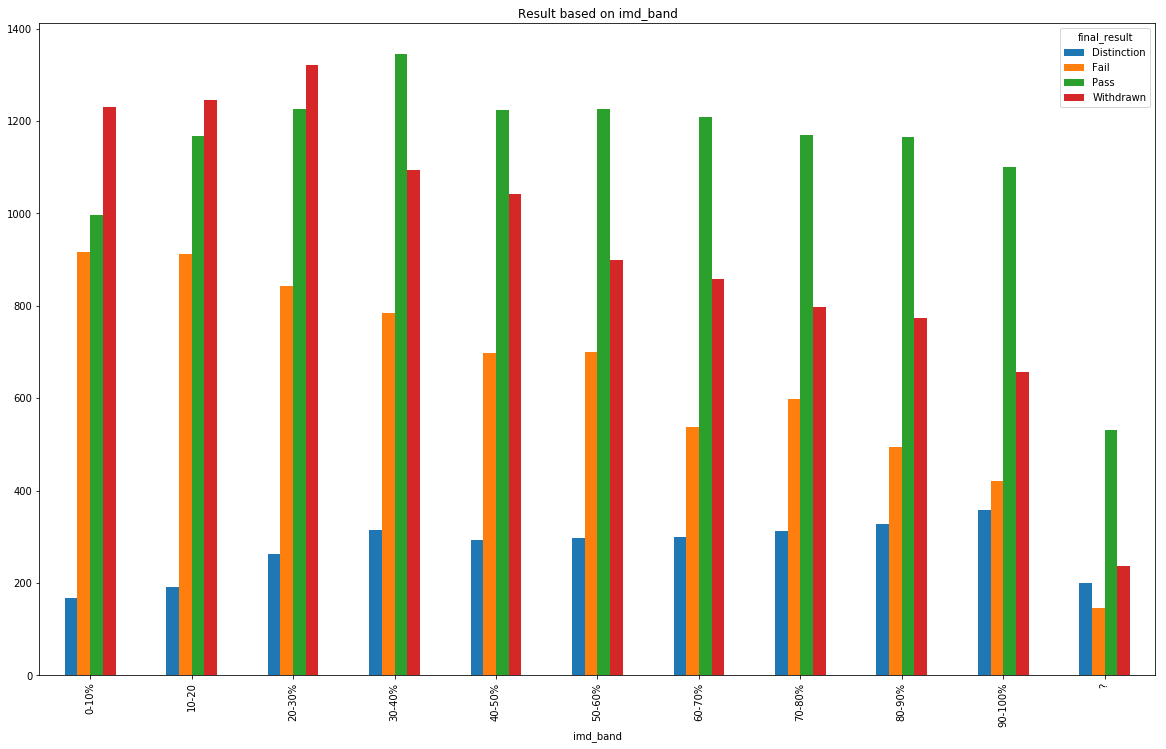

In [173]:
student_info.groupby(['imd_band','final_result']).size().unstack().plot(kind='bar', figsize = (20,12), title='Result based on imd_band')
plt.show()

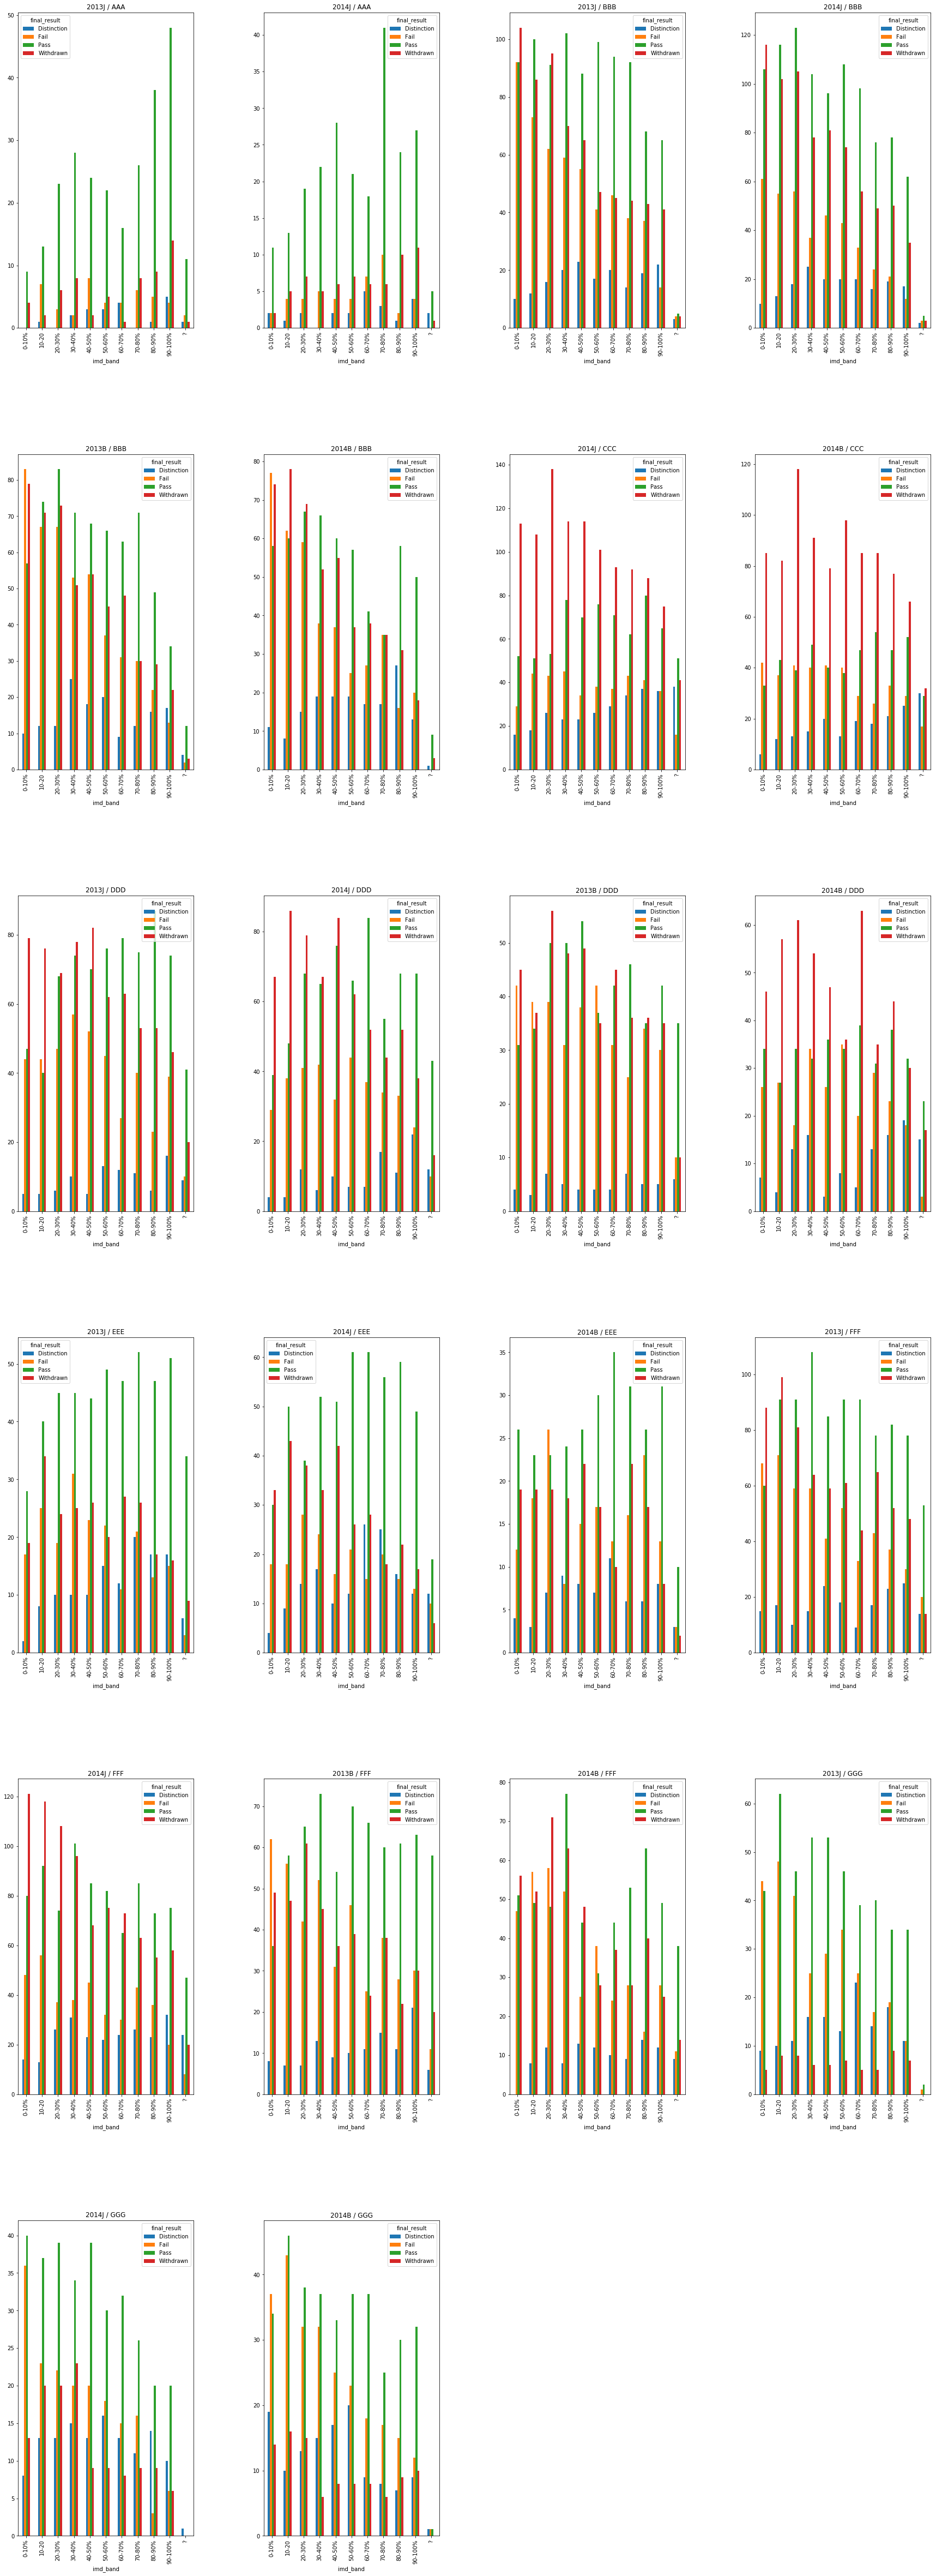

In [174]:
plot_grid(student_info, 'code_module','code_presentation','imd_band','final_result')

In [176]:
# --------- Rough ------
#df = student_info[student_info['code_module'] == 'AAA']
#df = df[df['code_presentation'] == '2014B']
#df.groupby(['highest_education','final_result']).fillna(0).size

#student_info.groupby('age_band').size() #---- Need to categorize
student_info.groupby('imd_band').size()  #---- need to categorize

imd_band
0-10%      3311
10-20      3516
20-30%     3654
30-40%     3539
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
?          1111
dtype: int64

### Student VLE data

***Get which activity is accessed more***

In [25]:
student_vle_all = student_vle.merge(vle, on = 'id_site', how = 'left')
#student_vle_all.head()

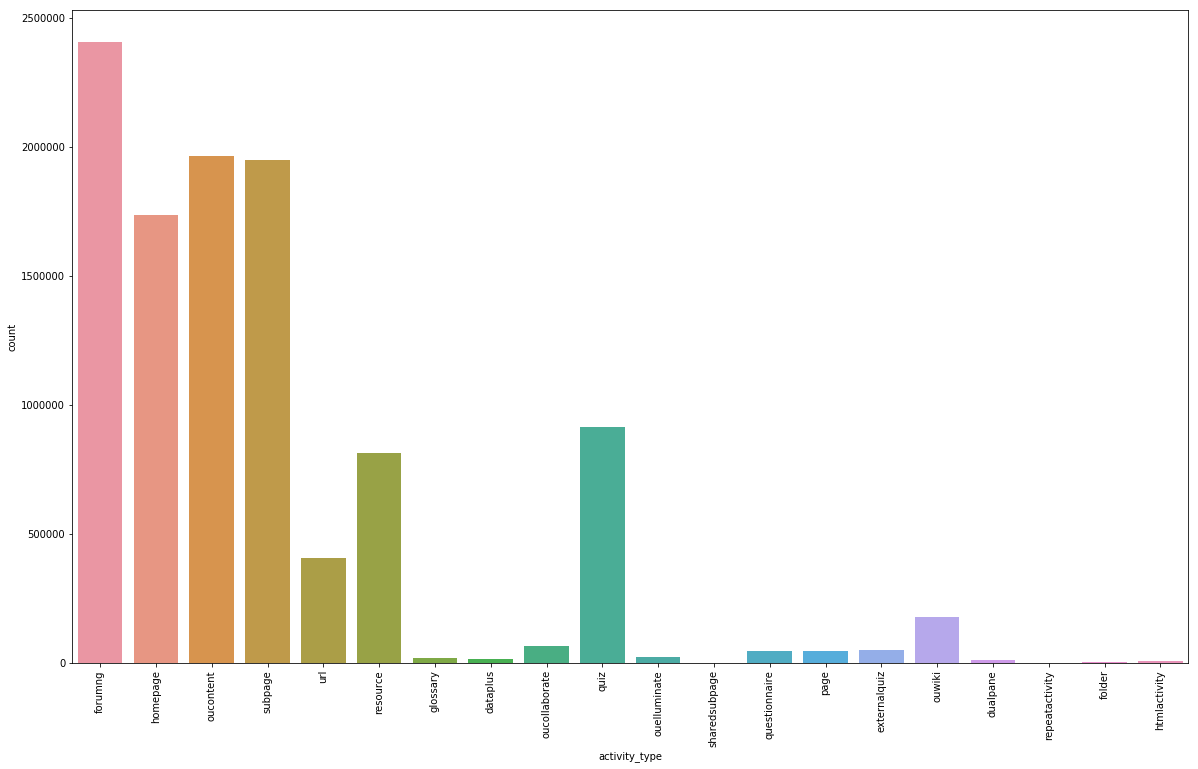

In [26]:
plt.figure(figsize=(20,12))
sns.countplot(student_vle_all.activity_type)
plt.xticks(rotation = 90)
plt.show()

### Clicks and Grades


In [34]:
student_clicks = student_vle.groupby(['id_student', 'code_module', 'code_presentation']).agg({'sum_click':['mean','sum']})
student_clicks.reset_index(level=[0,1,2], inplace=True)
student_clicks.columns = ['id_student', 'code_module', 'code_presentation', 'mean_clicks', 'sum_clicks']
#student_clicks
# merging student_clicks with student info
student_course_info = pd.merge(student_info,student_clicks, how='left', left_on=['id_student', 'code_module', 'code_presentation'],right_on=['id_student', 'code_module', 'code_presentation'])
student_course_info = student_course_info[['code_module','code_presentation','id_student','gender','region','highest_education','imd_band','age_band','num_of_prev_attempts','studied_credits','disability','mean_clicks','sum_clicks','final_result']]
student_course_info.reset_index(level=[0], inplace=True)
student_course_info.head()

,index,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,mean_clicks,sum_clicks,final_result
0,0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,4.765306,934.0,Pass
1,1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,3.337209,1435.0,Pass
2,2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,3.697368,281.0,Withdrawn
3,3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,3.254902,2158.0,Pass
4,4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,2.937500,1034.0,Pass


<Figure size 1440x864 with 0 Axes>

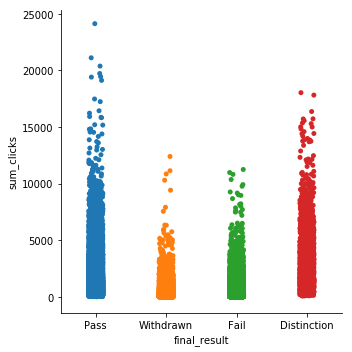

In [43]:
# Import required packages
#from sklearn import preprocessing
#--- as final_result is a categorical column we can convert that into numeric using label_encoding
#labelEncoder = preprocessing.LabelEncoder()
#student_course_info['final_result'] = labelEncoder.fit_transform(student_course_info['final_result'])
#student_course_info[['sum_clicks','final_result']].plot(kind = 'scatter', x='final_result', y = 'sum_clicks', figsize = (20,12), title='Clicks and Grades')
plt.figure(figsize=(20,12))
sns.catplot(x='final_result', y = 'sum_clicks', data = student_course_info)
plt.show()


***Insights***
- Here we can see that the number of students with more number of clicks have more chance of passing or getting distinction
- on the other side students with low clicks are more prone to fail